In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [ ]:
cfg = get_whar_cfg(WHARDatasetID.UCI_HAR)
dataset = PytorchAdapter(cfg, override_cache=False)

Overriding cache...
Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Parsing...


Caching sessions: 100%|██████████| 400/400 [00:00<00:00, 552.83it/s]


Validating common format...


Validating sessions: 100%|██████████| 400/400 [00:00<00:00, 860.66it/s]


Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.


Loading windows: 100%|██████████| 9499/9499 [00:06<00:00, 1474.66it/s]


subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(train_batch_size=32)

Getting normalization parameters...


Caching windows: 100%|██████████| 9499/9499 [00:07<00:00, 1347.16it/s]


train: 6856 | val: 761 | test: 1882


In [4]:
weights = dataset.get_class_weights(train_loader)
print(weights)

{2: 0.8383414556801113, 0: 0.8589616913309672, 1: 0.912997680082997, 3: 0.9906996103028265, 5: 1.1276580831701193, 4: 1.2713414794329787}


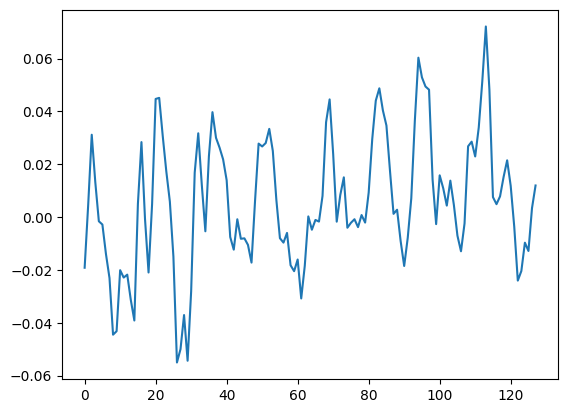

In [11]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 1])
plt.show()